<span style="font-family:Georgia;">

# Modelos caóticos de cáncer

<span style="font-family:Georgia;">

## Introducción biológica

### Células madre cancerosas

En el estudio del cáncer, se ha identificado que **las células madre cancerosas ([CSCs](https://en.wikipedia.org/wiki/Cancer_stem_cell))** constituyen una subpoblación clave dentro del tumor, con capacidad de **autorrenovación**, **resistencia a tratamientos** y **potencial metastásico**. Las terapias convencionales suelen eliminar la mayoría de las células tumorales, pero no siempre erradican estas CSCs(Cancer Stem Cells), lo que puede conducir a **recaídas** o **resistencia terapéutica**. Por ello, las estrategias actuales buscan **enfocarse en este tipo de células** o incluso **reprogramarlas** hacia estados menos agresivos.

<img src="imgs\Cancer_stem_cells.png" width=600>

<span style="font-family:Georgia;">

### Paisaje de Waddington

Un marco conceptual útil para entender este comportamiento es el **“paisaje epigenético de [Waddington](https://www.ptglab.com/news/blog/cell-fate-commitment-and-the-waddington-landscape-model/?srsltid=AfmBOorpmChnbZkpTmZyx_jvgdBkaasrq6vBH6ZxbYWX3wNmiwxT2qqa)”**, una metáfora en la que el destino celular se representa como una **canica que rueda por un paisaje lleno de valles y colinas**. Cada valle representa un posible tipo celular estable (por ejemplo, una célula diferenciada o una célula madre). En el contexto tumoral, el paisaje puede **deformarse dinámicamente** debido a señales del microambiente, mutaciones o influencia del sistema inmune, permitiendo que una célula “salte” de un valle a otro. Esta imagen ilustra la **plasticidad y la sensibilidad del sistema biológico a pequeñas perturbaciones**.

<img src="imgs\Gladstone-Waddington-Model.jpg" width=600>


<span style="font-family:Georgia;">

La **reprogramación pluripotente** —como la realizada en células somáticas mediante factores de Yamanaka— demuestra experimentalmente que los estados celulares pueden ser **revertidos** o **[redirigidos](https://gladstone.org/news/mutant-stem-cells-defy-rules-development)** con las señales adecuadas. Este descubrimiento ha inspirado nuevos enfoques terapéuticos que buscan **modificar el destino celular** dentro del tumor, ya sea haciendo a las células más visibles para el sistema inmune o llevándolas hacia estados más controlables.

<img src="imgs\waddington.png" width=600>

<span style="font-family:Georgia;">

##  Modelo

Sea:
- $T(t)$ el número de **células tumorales**,
- $H(t)$ el número de **células sanas (tejido huésped)**,
- $E(t)$ el número de **células efectoras del sistema inmune**.

El modelo general es:
$$
\begin{aligned}
\dot T &=
\underbrace{r_1\,T\!\left(1-\frac{T}{k_1}\right)}_{\substack{\text{crecimiento logístico}\\ \text{de células tumorales}}}
\;-\;
\underbrace{a_{12}\,T\,H}_{\substack{\text{pérdida tumoral por}\\{ \text{competencia con}}\\{\text{células sanas}}}}
\;-\;
\underbrace{a_{13}\,T\,E}_{\substack{\text{muerte tumoral}\\{ \text{por células efectoras}}}},\\[2mm]
\dot H &=
\underbrace{r_2\,H\!\left(1-\frac{H}{k_2}\right)}_{\substack{\text{crecimiento logístico}\\ \text{del tejido sano}}}
\;-\;
\underbrace{a_{21}\,T\,H}_{\text{inactivación de H por T}},\\[2mm]
\dot E &=
\underbrace{\frac{r_3\,T\,E}{T+k_3}}_{\substack{\text{estimulación inmune}\\ \text{por antígenos (saturante)}}}
\;-\;
\underbrace{a_{31}\,T\,E}_{\substack{\text{inactivación}\\ \text{de efectores por T}}}
\;-\;
\underbrace{d_3\,E}_{\substack{\text{muerte natural}\\ \text{de efectores}}}.
\end{aligned}
$$
### Interpretación de los parámetros
- $r_1, k_1$: tasa y capacidad de carga **logística** del tumor.
- $r_2, k_2$: tasa y capacidad de carga del tejido sano.
- $r_3, k_3$: parámetros de **estimulación** inmune por antígenos tumorales (respuesta **saturable**).
- $d_3$: muerte natural de efectores inmunes.
- $a_{12}$: **competencia** (H inhibe a T).
- $a_{21}$: inactivación de **H por T**.
- $a_{13}$: **matanza** de T por E.
- $a_{31}$: **inactivación** de E por T.


<span style="font-family:Georgia;">

## Reescalamiento adimensional
Definimos $x_1=T/k_1$, $x_2=H/k_2$, $x_3=E/k_3$ y $\tau=r_1 t$. 

## Ejercicio 1
Argumenta porque con estos cambio de variables la dinámica queda de la sigueinte forma:

$$
\begin{aligned}
\dot x_1 &= x_1(1-x_1) - a_{12} x_1 x_2 - a_{13} x_1 x_3,\\
\dot x_2 &= r_2 x_2 (1-x_2) - a_{21} x_1 x_2,\\
\dot x_3 &= \frac{r_3 x_1 x_3}{x_1+k_3} - a_{31} x_1 x_3 - d_3 x_3.
\end{aligned}
$$

> Los parámetros no son los mismos que en el modelo con dimensiones(estan escritos igual por simplicidad). Da explicitamente la definición de los nuevos parámetros en función de los anteriores. 

In [1]:
# Implementación numérica (RK4) 
%matplotlib widget
from cancer import *

<span style="font-family:Georgia;">

## Ejercicio 1
Para el siguiente grupo parámetros y condiciones inciales grafica(usando un método numérico) la evolución de las variables $x_1,x_2$ y $x_3$, así como su espacio fase y comenta el comportamiento que estas gráficas representan.

In [ ]:
x0_list = [[0.1,0.1,0.1], [0.11,0.1,0.1]] # Condiciones iniciales cercanas

# 1) 
params_1 = {
    "a21": 1.5, "d3": 0.5, "r2": 0.6, "a31": 0.2,
    "r3": 4.5, "a13": 2.5, "k3": 1.0, "a12": 1.10
}
# 2) 
params_2 = {
    "a21": 1.5, "d3": 0.5, "r2": 0.6, "a31": 0.15,
    "r3": 3.5, "a13": 2.0, "k3": 1.0, "a12": 0.90
}
# 3) 
params_3 = {
    "a21": 1.5, "d3": 0.5, "r2": 0.6, "a31": 0.20,
    "r3": 4.0, "a13": 2.5, "k3": 1.0, "a12": 0.95
}
# 4) Caótico (atractor de Itik & Banks)
params_caotico = {
    "a21": 1.5, "d3": 0.5, "r2": 0.6, "a31": 0.20,
    "r3": 4.5, "a13": 2.5, "k3": 1.0, "a12": 1.00
}
# 5) 
params_5 = {
    "a21": 1.5, "d3": 0.5, "r2": 0.6, "a31": 0.18,
    "r3": 4.2, "a13": 2.4, "k3": 1.0, "a12": 0.97
}
# 6)
params_6 = {
    "a21": 1.5, "d3": 0.8, "r2": 0.6, "a31": 0.25,
    "r3": 3.0, "a13": 1.5, "k3": 1.0, "a12": 0.80
}
# 7) 
params_7 = {
    "a21": 1.5, "d3": 0.5, "r2": 0.6, "a31": 0.10,
    "r3": 2.5, "a13": 1.8, "k3": 1.0, "a12": 0.85
}
# 8)
params_8 = {
    "a21": 1.5, "d3": 0.5, "r2": 0.6, "a31": 0.40,
    "r3": 4.0, "a13": 2.0, "k3": 1.0, "a12": 0.85
}


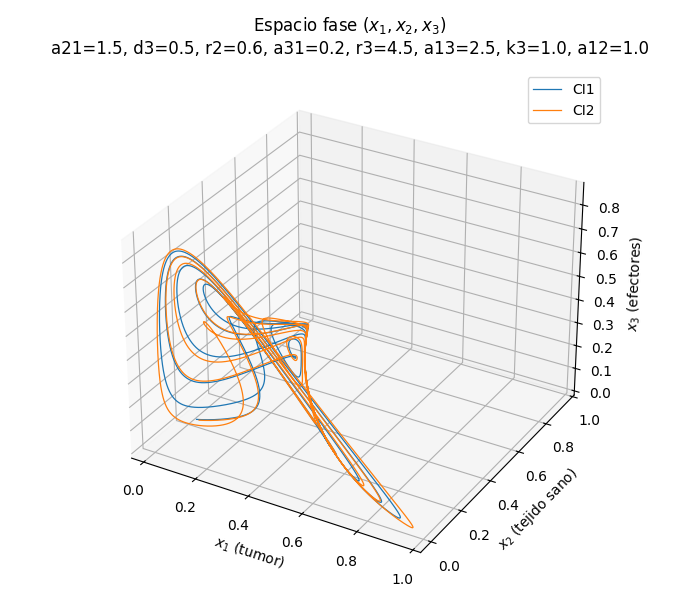

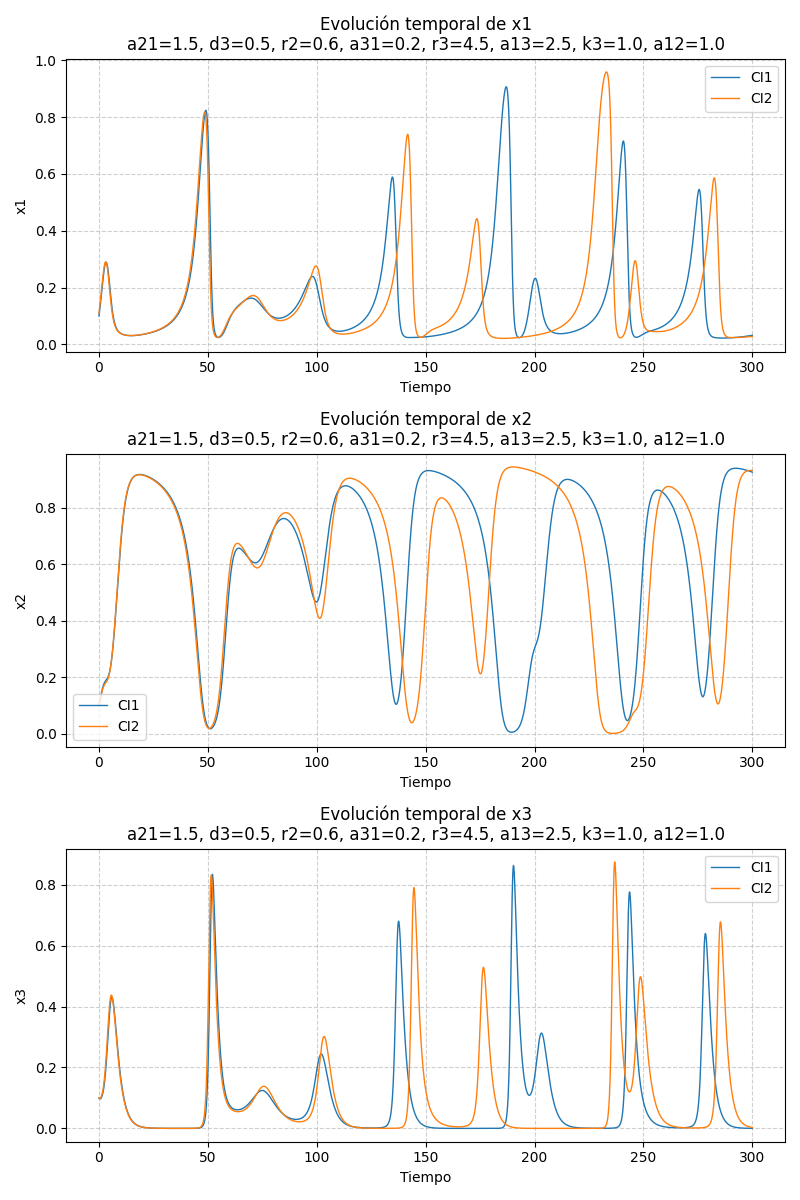

In [ ]:
# Estado caotico
x0_list = [[0.1,0.1,0.1], [0.11,0.1,0.1]] # Condiciones iniciales cercanas
graficar_trayectorias_y_fase(
    f_state, x0_list, params_caotico,
    variables=["x1","x2","x3"], dt=0.01, steps=30000,
    graficar_fase=True, etiquetas=["CI1","CI2"]
)

<span style="font-family:Georgia;">

## Caos en modelos de cancer

## Importancia del análisis de sistemas dinámicos caóticos en modelos de cáncer

Las imágenes siguientes representan dos formas complementarias de visualizar la dinámica de los estados celulares a lo largo del desarrollo y la oncogénesis, inspiradas en el **paisaje epigenético de Waddington**. Este paisaje se concibe como una superficie de energía o *cuasi-potencial* $ U $, donde cada punto describe el **estado global de expresión génica** de una célula, y las “trayectorias” corresponden a su evolución temporal en el espacio de estados.

### El paisaje de Waddington y los atractores celulares

En el primer diagrama, las células madre (en la cima) pueden **diferenciarse** siguiendo “carriles” o *chreods* hacia valles estables —los **atractores funcionales** que representan tipos celulares maduros y estables.  
Sin embargo, en regiones no exploradas evolutivamente (zonas rosadas), existen **atractores no utilizados o inestables** donde la célula puede quedar atrapada debido a **perturbaciones genéticas o epigenéticas**. Estos estados corresponden a **células cancerosas**, que se desvían de las trayectorias normales de diferenciación.

El cáncer, en este sentido, puede entenderse como una **reconfiguración del paisaje dinámico**, donde surgen **nuevos atractores patológicos**.

###  Atractores extraños y caos determinista

El segundo diagrama amplía esta idea incorporando el concepto de **atractor caótico** (*strange attractor*).  
Aquí, la evolución del sistema no converge a un punto fijo ni a un ciclo periódico, sino que se mueve dentro de una región fractal del espacio de estados:  
$$
(x_1(t),x_2(t),x_3(t)) \in \mathbb{R}^3,
$$
como la que observamos en el modelo de *Itik y Banks (2010)*.

Este tipo de comportamiento refleja la **plasticidad y la sensibilidad extrema** de las redes de regulación génica:  
- Pequeñas variaciones en parámetros o condiciones iniciales (mutaciones, señales del microambiente, estímulos inmunes) pueden generar **trayectorias completamente distintas**.  
- A pesar de la aparente imprevisibilidad, el sistema sigue siendo **determinista**: la evolución obedece reglas fijas, pero con **dependencia exponencial** de las condiciones iniciales (medida por el **exponente de Lyapunov**).

### Relevancia biológica y predictiva

Analizar el sistema como **dinámica caótica** aporta ventajas cruciales:

1. **Comprensión estructural:** permite identificar regiones del espacio de estados donde el sistema tiene mayor inestabilidad (valles poco profundos o bifurcaciones), asociadas con transiciones fenotípicas, metástasis o resistencia terapéutica.  
2. **Predicción temporal:** aunque el largo plazo es impredecible, el **horizonte de predicción** $ T_{\text{pred}} \approx 1/\lambda_1 $ (inverso del exponente de Lyapunov máximo) define la ventana en la que las intervenciones pueden ser efectivas.  
3. **Diseño de terapias adaptativas:** al reconocer que el tumor “oscila” entre estados, se pueden aplicar tratamientos pulsátiles o sincronizados con la dinámica para empujar el sistema fuera del atractor maligno.  
4. **Interpretación de la heterogeneidad tumoral:** el caos explica por qué una misma línea celular puede exhibir **fluctuaciones fenotípicas espontáneas** sin necesidad de mutaciones adicionales.


### Conexión con los modelos matemáticos

El modelo tridimensional de *Itik y Banks (2010)*, al describir las interacciones entre **tumor ($T$)**, **tejido sano ($H$)** y **efectores inmunes ($E$)**, genera atractores equivalentes a los valles del paisaje:

- **Punto estable:** tejido sano, sin tumor.  
- **Ciclo límite:** coexistencia estable tumor–inmunidad.  
- **Atractor caótico:** evolución oscilante e impredecible del tumor.

Estas trayectorias pueden visualizarse como caminos que recorren el paisaje epigenético, donde el atractor caótico representa una **célula atrapada en un valle irregular**: no muere ni se estabiliza, sino que fluctúa persistentemente, un comportamiento característico de **células madre cancerosas** o estados resistentes.

<img src="imgs\Landscape.png" width=600> <img src="imgs\CaosLandscape.png" width=600>

<span style="font-family:Georgia;">

## Conclusión

El estudio de **sistemas dinámicos caóticos** en biología del cáncer no solo proporciona un marco cuantitativo para describir la complejidad y plasticidad de los tumores, sino que también:
- Vincula la **teoría matemática de atractores** con la **biología celular y molecular**,  
- Permite **predecir transiciones críticas** entre fenotipos,  
- Y ofrece una base teórica para el desarrollo de **estrategias terapéuticas dinámicas** que busquen reconfigurar el paisaje epigenético, guiando a las células hacia estados normales o controlados.


<span style="font-family:Georgia;">

## Referencias

- **Abicumaran Uthamacumaran**, (2021). A review of dynamical systems approaches for the detection of chaotic attractors in cancer networks, Patterns, Volume 2, Issue 4.
- **Itik, M., and Banks**, S.P. (2010). Chaos in a three-dimensional cancer
model. Int. J. Bifurcation Chaos 20, 71–79.
- **Letellier, C., Denis, F., and Aguirre**, L.A. (2013). What can be learned from
a chaotic cancer model? J. Theor. Biol. 322, 7–16.
- **Armando Aranda-Anzaldo and Myrna A.R. Dent**, (2018). Landscaping the epigenetic landscape of cancer. Progress in Biophysics and Molecular Biology.